# Problem Statement
This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. You will need to submit a Jupyter notebook for the same.

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes. How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

# A. Understanding Data

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

sns.set(rc={'figure.figsize':(15,10)})
pd.set_option('display.max_columns', None)

# Importing StatsModel Library for displaying detailed information about model¶
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Importing Scikit Library for evaluating requirement specific parameters
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

### 2. Importing csv data

In [3]:
# Importing day.csv
day = pd.read_csv('day.csv')

In [4]:
# Looking at the first five rows
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 3. Check for NULL values

In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Observation: No NULL values found in any column

In [6]:
#info about df 
day.shape

(730, 16)

In [7]:
#info about df 
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#printing loan first 10 values to understand the data better 
print(day.head(10))

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   
5        6  06-01-2018       1   0     1        0        4           1   
6        7  07-01-2018       1   0     1        0        5           1   
7        8  08-01-2018       1   0     1        0        6           0   
8        9  09-01-2018       1   0     1        0        0           0   
9       10  10-01-2018       1   0     1        0        1           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.

# B.Data Cleaning

In [9]:
#checking the % of missing values 
a = (round(day.isnull().sum(axis=0)/len(day.index),2)*100)
print(a.head(16))

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


### Observation: No missing values were found

# C. Data Analysis

## Visualising Numeric Variables

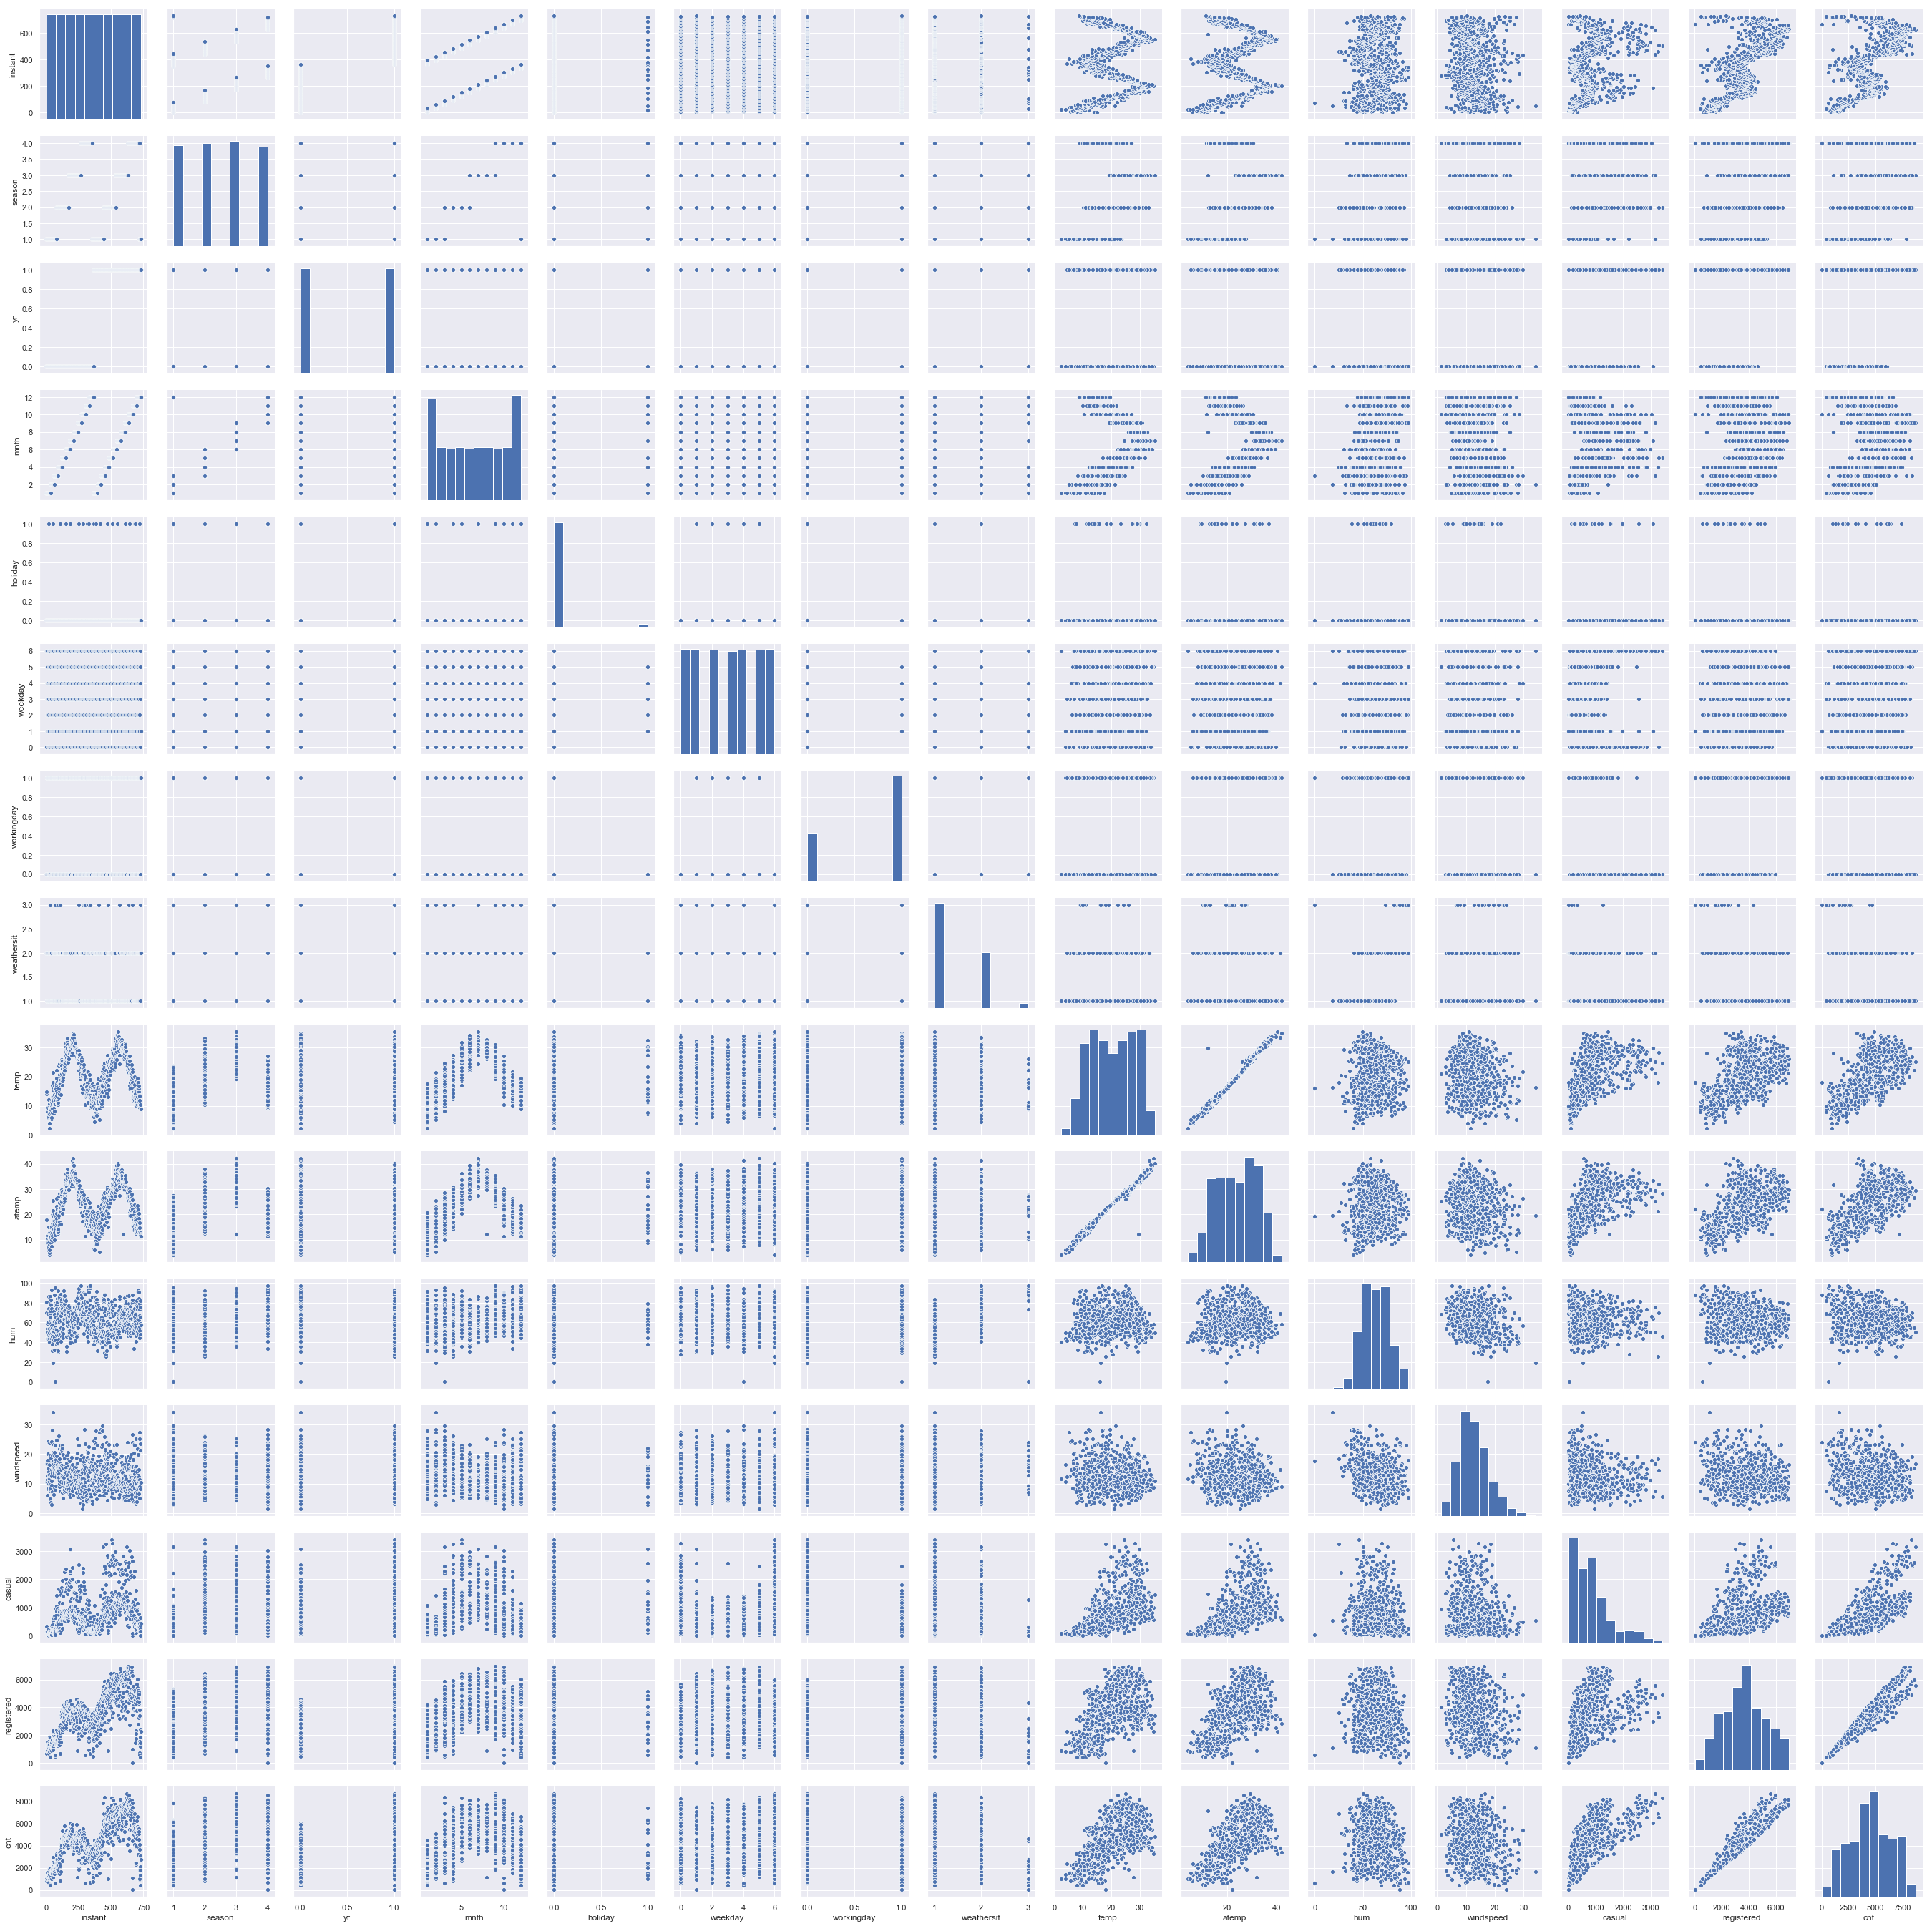

In [10]:
sns.pairplot(day)
plt.show()

### Pair plot need to be rechecked after cleaning the data, at this point it is not much clear due to multiple dependent variables.

## Checking correlation among different variables for better analysis

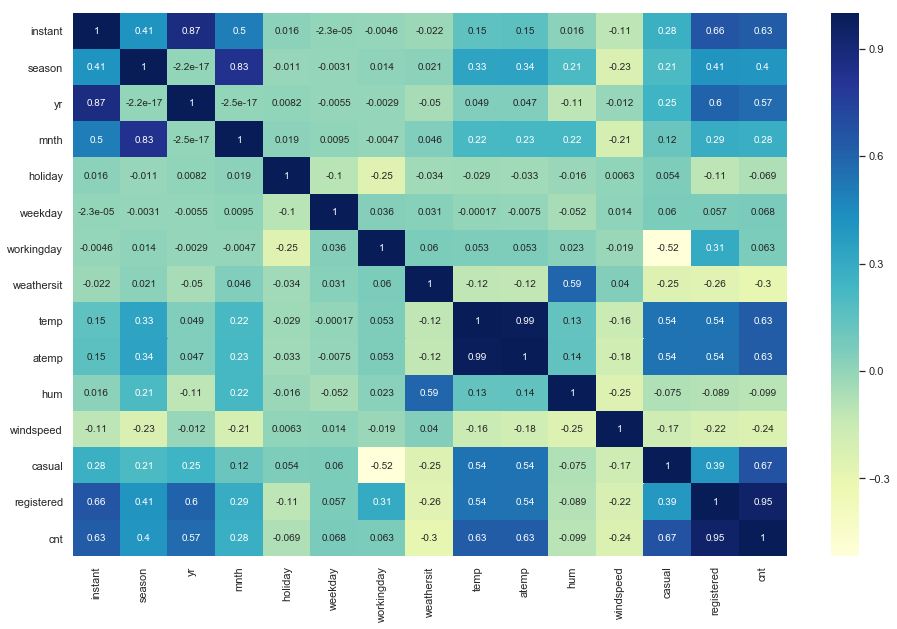

In [11]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(day.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Observation: 
    1. Season and month have good Correlation which is 83%
    2. atemp and temp have good Correlation  which is 99%
    3. temp and registered have little Correlation  which is 54%
    4. temp and casual have little Correlation  which is 54%
    3. registered and cnt have good Correlation  which is 95%
    4. Year and cnt have little Correlation  which is 57%
    5. weathersit and hum have little Correlation  which is 59%
    6. cnt and casual have little Correlation  which is 67%
    

### C.1. dteday variable Analysis

In [12]:
day.dteday.describe()

count            730
unique           730
top       21-05-2018
freq               1
Name: dteday, dtype: object

#### Check if any date is out of range

In [13]:
day['dteday'].apply(lambda x: int(x.split('-')[0])).describe()

count    730.000000
mean      15.720548
std        8.802278
min        1.000000
25%        8.000000
50%       16.000000
75%       23.000000
max       31.000000
Name: dteday, dtype: float64

#### Check if any month is out of range

In [14]:
day['dteday'].apply(lambda x: int(x.split('-')[1])).describe()

count    730.000000
mean       6.526027
std        3.450215
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: dteday, dtype: float64

#### Check if any year out of range

In [15]:
day['dteday'].apply(lambda x: int(x.split('-')[2])).describe()

count     730.000000
mean     2018.500000
std         0.500343
min      2018.000000
25%      2018.000000
50%      2018.500000
75%      2019.000000
max      2019.000000
Name: dteday, dtype: float64

##### Observation: 

All the range of date, month & year are in the valid range, hence we can proceed ahead with this column without dropping / changing any records

On analysing date column we can see that all the attributes of date except for day are comfortably covered under month & year column.

So, we will extract only the date part from this column and use it.¶

In [16]:
day['dteday'] = day['dteday'].apply(lambda x: int(x.split('-')[0]))
print(day.head())

   instant  dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1       1       1   0     1        0        6           0   
1        2       2       1   0     1        0        0           0   
2        3       3       1   0     1        0        1           1   
3        4       4       1   0     1        0        2           1   
4        5       5       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


#### Renaming the column name from 'dteday' to 'date'

In [17]:
day = day.rename(columns={"dteday": "date"})

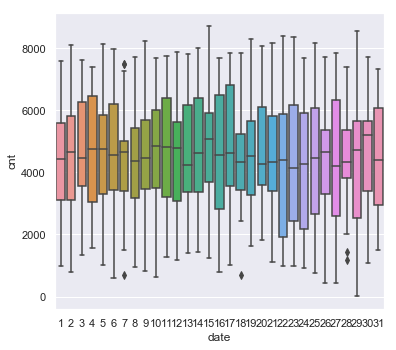

In [18]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'date', y = 'cnt', data = day)

#### Observation:

Day coulumn have no much impact with cnt "count of total rental bikes"

### C.2. Season :season (1:spring, 2:summer, 3:fall, 4:winter)

In [19]:
day.season.describe()

count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

#### Observation: 
Season column is varied between 1 to 4 which are properly defined in data dictionary, 
therefore we can proceed ahead with this column without dropping / changing any records

We need to map these numbers to respectie seasons, so that these column values will be further used to generate dummy variable as it is a Categorical Nominal Type Data
We should map this column as follows:
1. spring
2. summer
3. fall
4. winter

In [20]:
day['season'] = day['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

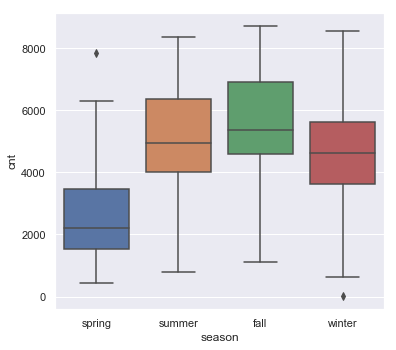

In [21]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)

#### Observation:
With plot above we see that in Fall season total ride counts are increased significantly

### C.3. Year (0: 2018, 1:2019)

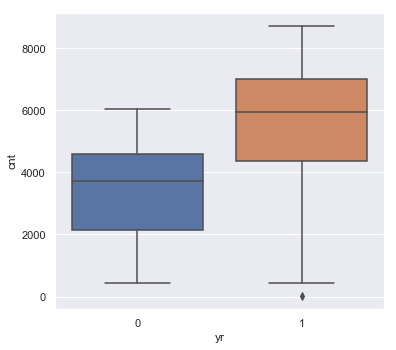

In [22]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = day)

#### Observation:
With plot above we are able to see that in year 2019 Total Ride counts are increased signifcantly.

### C.4. Month ( 1 to 12)

In [23]:
day.mnth = day.mnth.apply(lambda x: datetime.date(1900, x , 1).strftime('%B'))

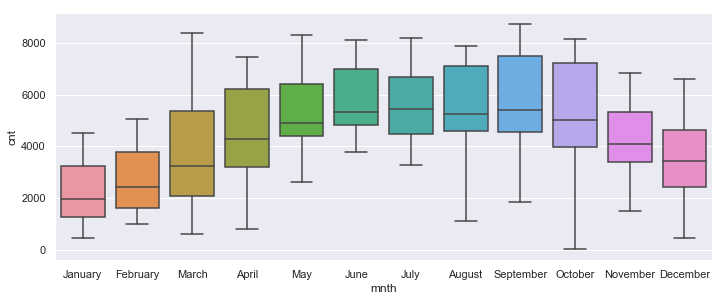

In [24]:
plt.figure(figsize=(40, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)

#### Observation:
With plot above we are able to see that in the month of June,July,Aug,Sept Total ride counts are increasing much

### C.5 holiday(weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule))

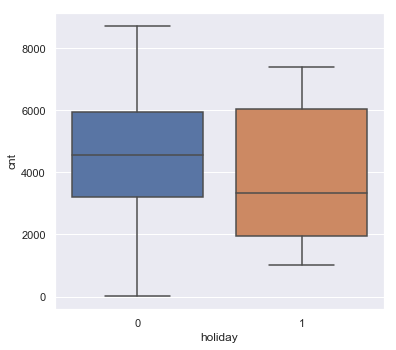

In [25]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)

### C.5 Weekday(day of the week)

In [26]:
day.weekday.describe()

count    730.000000
mean       2.997260
std        2.006161
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        6.000000
Name: weekday, dtype: float64

In [27]:
# mapping days numbers with appropriate days name to see in graph properly
day['weekday'] = day.weekday.map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})

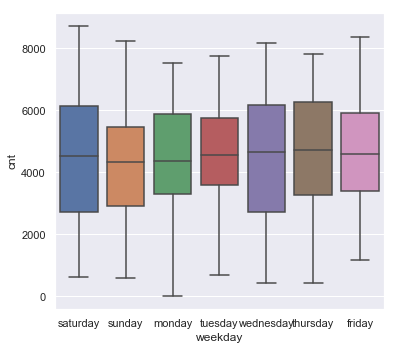

In [28]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)

### C.5 workingday

In [29]:
day.workingday.describe()

count    730.000000
mean       0.683562
std        0.465405
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: workingday, dtype: float64

In [30]:
day.groupby(by='workingday').workingday.count()

workingday
0    231
1    499
Name: workingday, dtype: int64

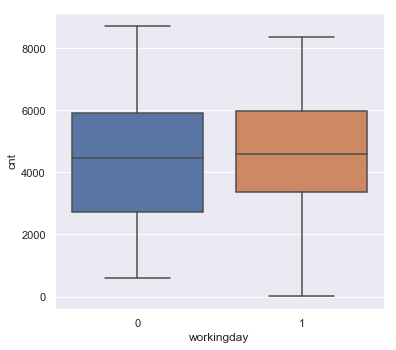

In [31]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)

### C.6 weathersit

In [32]:
day.weathersit.describe()

count    730.000000
mean       1.394521
std        0.544807
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: weathersit, dtype: float64

In [33]:
day['weathersit'] = day.weathersit.map({1: 'clear', 2: 'mist', 3: 'light', 4: 'heavy'})

In [34]:
day.groupby(by='weathersit').weathersit.count().sort_values(ascending=False)

weathersit
clear    463
mist     246
light     21
Name: weathersit, dtype: int64

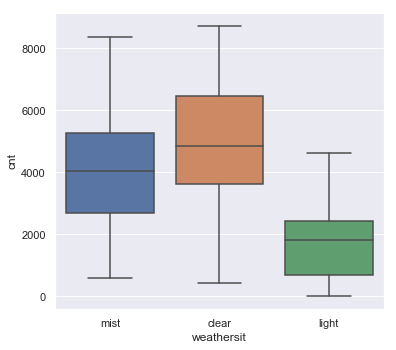

In [35]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)

### C.7. temp(temperature in Celsius)

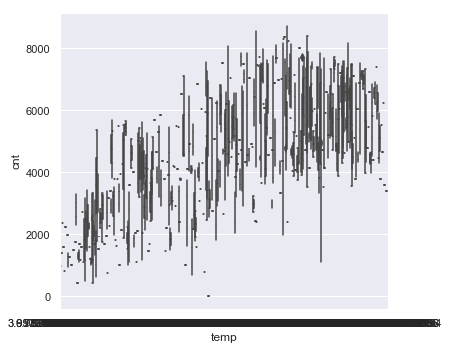

In [36]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'temp', y = 'cnt', data = day)

#### There is no much sense of plotting above graph we will proceed with further analysis

### C.8. atemp(feeling temperature in Celsius)

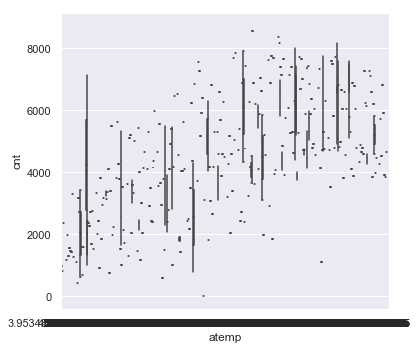

In [37]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'atemp', y = 'cnt', data = day)

#### There is no much sense of plotting above graph we will proceed with further analysis

### C.9. hum(humidity)

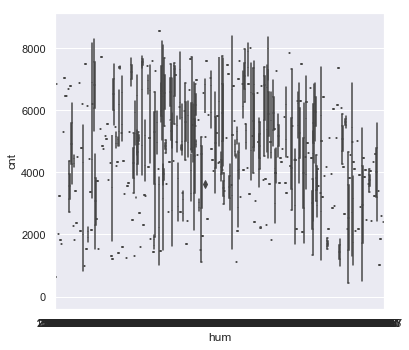

In [38]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'hum', y = 'cnt', data = day)

#### There is no much sense of plotting above graph we will proceed with further analysis

In [39]:
day.hum.describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

### Observation: Humidity minimum value can not be zero in any case, so we need to fix this

Text(0.5,0,'Humidity')

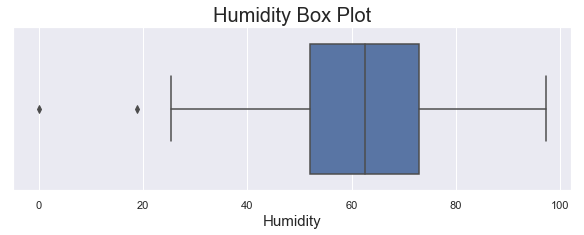

In [40]:
# box plot
plt.figure(figsize=(10, 3))
sns.boxplot(data=day, x='hum')
plt.title('Humidity Box Plot', fontdict={'fontsize': 20})
plt.xlabel('Humidity', fontdict={'fontsize': 15})

In [41]:
day[day['hum'] == 0]

,instant,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,10,spring,0,March,0,thursday,1,light,15.952731,19.2834,0.0,17.545759,46,577,623


##### Observation: Row 68 have "0" humidity value find for which we need to try to impute it with proper value for getting better results.

## Imputing hum "0" value with mean value

In [42]:
### Checking for mean
mean_value = day.hum.mean()
mean_value

62.76517493150686

In [43]:
day.at[int(day[day['hum'] == 0.0].hum.index.values), "hum"] = mean_value

### Checking again if 0 hum value filled or not with mean value

In [44]:
day[day['hum'] == 0]

,instant,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


### Now we filled hum value with proper mean value

### C10. Windspeed( wind speed)

In [45]:
day.windspeed.describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

#### Observation : Wind speed above values looks in proper range

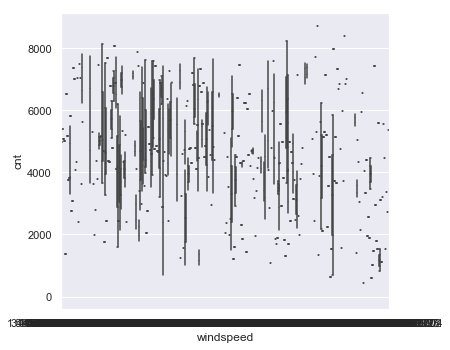

In [46]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'windspeed', y = 'cnt', data = day)

#### There is no much sense of plotting above graph we will proceed with further analysis

### C11. Casual(count of casual users)

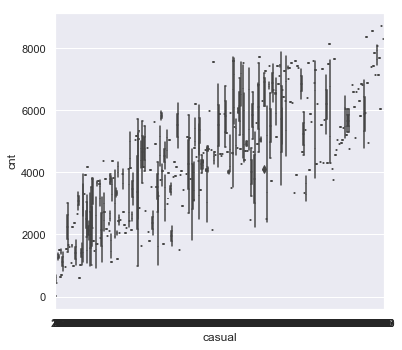

In [47]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'casual', y = 'cnt', data = day)

#### There is no much sense of plotting above graph we will proceed with further analysis

### C12. registered(count of registered users)

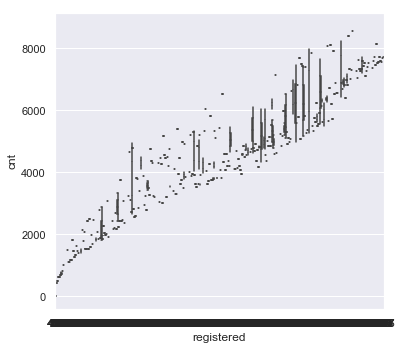

In [48]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'registered', y = 'cnt', data = day)

#### There is no much sense of plotting above graph we will proceed with further analysis

### C13. cnt (count of total rental bikes including both casual and registered)

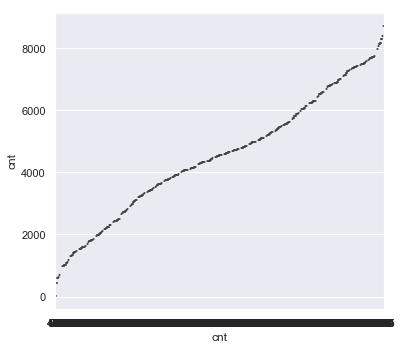

In [49]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'cnt', y = 'cnt', data = day)

#### There is no much sense of plotting above graph we will proceed with further analysis

### As we found these columns "casual" and "registered" may do the same thing which we can get from the total count "cnt" so we are dropping these 2 variables.

In [50]:
day = day.drop(columns=['casual', 'registered'])

In [51]:
day

,instant,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,spring,0,January,0,saturday,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,2,2,spring,0,January,0,sunday,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,3,3,spring,0,January,0,monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,4,spring,0,January,0,tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,5,spring,0,January,0,wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27,spring,1,December,0,thursday,1,mist,10.420847,11.33210,65.2917,23.458911,2114
726,727,28,spring,1,December,0,friday,1,mist,10.386653,12.75230,59.0000,10.416557,3095
727,728,29,spring,1,December,0,saturday,0,mist,10.386653,12.12000,75.2917,8.333661,1341
728,729,30,spring,1,December,0,sunday,0,clear,10.489153,11.58500,48.3333,23.500518,1796


# D. Data transformation

### Get the dummy variables for the feature 'mnth','season',"weekday",weathersit' and store it in a new variable - 'Categorical_var_status'

In [52]:
dummy_var_columns = ['mnth', 'season', 'weekday', 'weathersit']

In [53]:
Categorical_var_status = pd.get_dummies(day[dummy_var_columns], drop_first=True)

# Check what the dataset 'Categorical_var_status' looks like
Categorical_var_status.head()

,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,season_spring,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [54]:
day = pd.concat([day, Categorical_var_status], axis=1)

In [55]:
day.head(2)

,instant,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,season_spring,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
0,1,1,spring,0,January,0,saturday,0,mist,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,2,2,spring,0,January,0,sunday,0,mist,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


#### Now, we don't need those 4 dummmy columns. we can drop them now

In [56]:
day = day.drop(columns=dummy_var_columns)

# E: Splitting the Data into Training and Testing Sets

### As you know, the first basic step for regression is performing a train-test split.

#### So Here , we are spliting data into 2 parts
. Train Data (On which model will be build and is almost 70% of total data)


. Test Data (On which build model will be tested and is almost 30% of total data)

In [57]:
from sklearn.model_selection import train_test_split



# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [58]:
df_train.shape

(510, 32)

In [59]:
df_train.head(2)

,instant,date,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,season_spring,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
653,654,16,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
576,577,31,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [60]:
df_test.shape

(219, 32)

In [61]:
df_test.head(2)

,instant,date,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,season_spring,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
184,185,4,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,536,20,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


# E. Rescaling the Features
As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

Min-Max scaling
Standardisation (mean-0, sigma-1)
This time, we will use MinMax scaling.

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler = MinMaxScaler()

In [64]:
day.head(10)

,instant,date,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,season_spring,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
0,1,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,2,2,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,3,3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,4,4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,5,5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5,6,6,0,0,1,8.378268,11.66045,51.8261,6.000868,1606,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
6,7,7,0,0,1,8.057402,10.44195,49.8696,11.304642,1510,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
7,8,8,0,0,0,6.765000,8.11270,53.5833,17.875868,959,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
8,9,9,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
9,10,10,0,0,1,6.184153,7.54440,48.2917,14.958889,1321,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [65]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
# remember dummy bariables dummy_var_columns = ['mnth', 'season', 'weekday', 'weathersit']
# Did not considered atemp , only one main temperature ok to be considered
num_vars = ['date', 'temp','atemp','hum', 'windspeed','cnt']
           
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()


,instant,date,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,season_spring,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
653,654,0.500000,1,0,1,0.509887,0.501133,0.473375,0.300794,0.864243,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
576,577,1.000000,1,0,1,0.815169,0.766351,0.659744,0.264686,0.827658,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,427,0.066667,1,0,0,0.442393,0.438975,0.553780,0.255342,0.465255,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
728,729,0.966667,1,0,0,0.245101,0.200348,0.377528,0.663106,0.204096,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
482,483,0.900000,1,0,0,0.395666,0.391735,0.385516,0.188475,0.482973,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1


In [66]:
df_train.describe()

,instant,date,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,season_spring,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,368.941176,0.487124,0.507843,0.025490,0.676471,0.537262,0.512989,0.567978,0.320768,0.513620,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.243137,0.245098,0.24902,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,209.868619,0.296648,0.500429,0.157763,0.468282,0.225844,0.212385,0.177341,0.169797,0.224593,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.429398,0.430568,0.43287,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,187.250000,0.233333,0.000000,0.000000,0.000000,0.339853,0.332086,0.428913,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,373.000000,0.500000,1.000000,0.000000,1.000000,0.540519,0.526811,0.570553,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,553.750000,0.733333,1.000000,0.000000,1.000000,0.735215,0.688457,0.695953,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,729.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


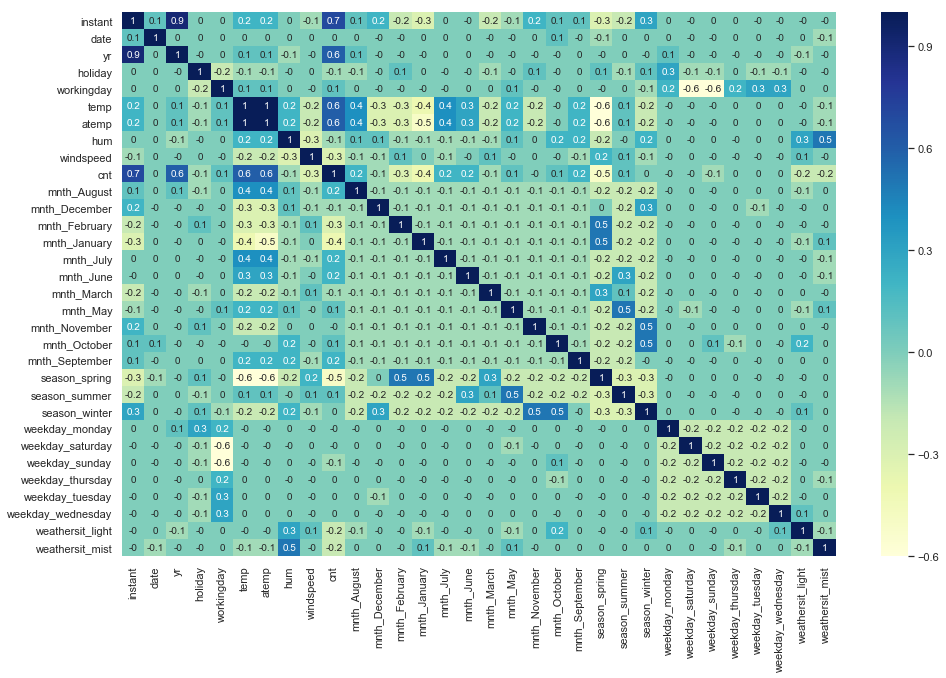

In [67]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(16, 10))
sns.heatmap(round(df_train.corr(), 1), annot=True, cmap='YlGnBu')
plt.show()

### Below are some of the observations based on above heatmap for train data:

    1. Season_winter and month have good Correlaion which is 0.7 compare to all others
   

# F.Dividing into X and Y sets for the model building

In [68]:
#Trained Target Variable
y_train = df_train.pop('cnt')

#Fixing Trained Feature(s) Variable
X_train = df_train

# G. Building our model
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

RFE
Recursive feature elimination

In [69]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [70]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 16)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [71]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('instant', False, 16),
 ('date', False, 13),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_August', False, 6),
 ('mnth_December', False, 2),
 ('mnth_February', False, 3),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 15),
 ('mnth_March', False, 14),
 ('mnth_May', False, 5),
 ('mnth_November', True, 1),
 ('mnth_October', False, 12),
 ('mnth_September', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weekday_monday', False, 8),
 ('weekday_saturday', True, 1),
 ('weekday_sunday', False, 7),
 ('weekday_thursday', False, 10),
 ('weekday_tuesday', False, 9),
 ('weekday_wednesday', False, 11),
 ('weathersit_light', True, 1),
 ('weathersit_mist', True, 1)]

In [72]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
30,weathersit_mist,True,1
24,weekday_saturday,True,1
22,season_winter,True,1
21,season_summer,True,1
20,season_spring,True,1
19,mnth_September,True,1
17,mnth_November,True,1
29,weathersit_light,True,1
12,mnth_January,True,1
13,mnth_July,True,1


#### RFE method has successfully evaluated top 12 predictors which will impact our outcome.
But, we will not rely on this enitirely and continue validating this 12 features manually by building model one by one and elimating any feature which will not satisfy our needs.

In [73]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'mnth_January', 'mnth_July', 'mnth_November', 'mnth_September',
       'season_spring', 'season_summer', 'season_winter', 'weekday_saturday',
       'weathersit_light', 'weathersit_mist'],
      dtype='object')

In [74]:
X_train.columns[~rfe.support_]

Index(['instant', 'date', 'atemp', 'mnth_August', 'mnth_December',
       'mnth_February', 'mnth_June', 'mnth_March', 'mnth_May', 'mnth_October',
       'weekday_monday', 'weekday_sunday', 'weekday_thursday',
       'weekday_tuesday', 'weekday_wednesday'],
      dtype='object')

## G.1 Model Building Process - 1

In [75]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.6
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.05e-190
Time:                        12:40:15   Log-Likelihood:                 521.04
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     493   BIC:                            -936.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2300      0.033  

#### In the above model we see that P-Value of "mnth_November" feature is more than 0.05, which make its co-efficient insignificant.
#### So, we will proceed ahead with dropping this feature and designing model again.

### G.2 Model Building Process - 2

In [76]:
col = col.drop(['mnth_November'])
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          2.18e-191
Time:                        12:40:15   Log-Likelihood:                 519.94
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2231      0.033  

### Checking VIF value for the cleaned model

In [77]:
def get_the_vif_df(local_df):
    vif_df = pd.DataFrame()
    vif_df['Features'] = local_df.columns
    vif_df['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    vif_df = vif_df.reset_index(drop=True)
    return vif_df

In [78]:
get_the_vif_df(X_train_rfe)

,Features,VIF
0,const,71.18
1,season_spring,5.12
2,temp,3.95
3,season_winter,3.62
4,season_summer,2.65
5,hum,2.10
6,workingday,1.88
7,weekday_saturday,1.78
8,weathersit_mist,1.65
9,mnth_January,1.57


### const VIF looks greater than 10 which need to be droped

## G.3 Model Building Process - 3

In [79]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'mnth_January', 'mnth_July', 'mnth_September', 'season_spring',
       'season_summer', 'season_winter', 'weekday_saturday',
       'weathersit_light', 'weathersit_mist'],
      dtype='object')

In [80]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [81]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          2.18e-191
Time:                        12:40:15   Log-Likelihood:                 519.94
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2231      0.033  

### Checking VIF value for the cleaned model

In [82]:
get_the_vif_df(X_train_rfe)

,Features,VIF
0,const,71.18
1,season_spring,5.12
2,temp,3.95
3,season_winter,3.62
4,season_summer,2.65
5,hum,2.10
6,workingday,1.88
7,weekday_saturday,1.78
8,weathersit_mist,1.65
9,mnth_January,1.57


## Both VIF and p-values looks under control now

# H. Residual Analysis of the train data

#### So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.As After building model, we cannot finalise untill we proove the residual analysis wherein we check whether the distribution of Error is around 0 or not.

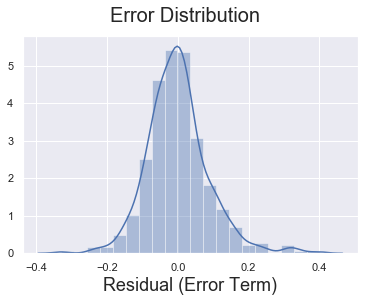

In [83]:
y_train_pred = lm.predict(X_train_rfe)

# Plot the histogram of the error terms
fig = plt.figure()
residual = y_train_pred - y_train
sns.distplot(residual, bins = 20)
fig.suptitle('Error Distribution', fontsize = 20)                  # Plot heading 
plt.xlabel('Residual (Error Term)', fontsize = 18)          # X-label
plt.show()

### Note: We can see from the above graph that the Error Distribution Is Normallly Distributed Across 0, which shows that our model has handled the assumption of Error Normal Distribution properly.

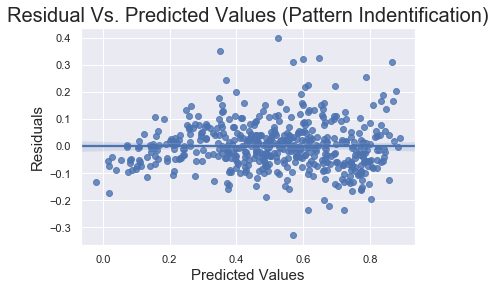

In [84]:
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

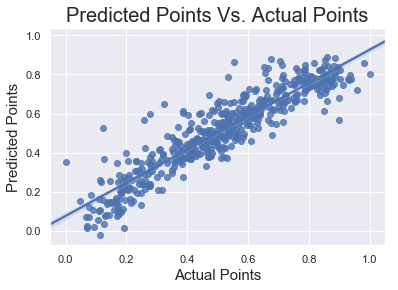

In [85]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

In [86]:
get_the_vif_df(X_train_rfe)

,Features,VIF
0,const,71.18
1,season_spring,5.12
2,temp,3.95
3,season_winter,3.62
4,season_summer,2.65
5,hum,2.10
6,workingday,1.88
7,weekday_saturday,1.78
8,weathersit_mist,1.65
9,mnth_January,1.57


# I. Making Predictions

### Applying the scaling on the test sets

In [87]:
num_vars = ['date', 'temp','atemp','hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head(10)

,instant,date,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,season_spring,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
184,185,0.100000,0,1,0,0.831783,0.769660,0.575080,0.084219,0.692706,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,536,0.633333,1,0,1,0.901354,0.842587,0.516506,0.153728,0.712034,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
299,300,0.866667,0,0,1,0.511964,0.496145,0.798722,0.334206,0.303382,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
221,222,0.300000,0,0,1,0.881625,0.795343,0.301917,0.339570,0.547400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,153,0.033333,0,0,1,0.817246,0.741471,0.149627,0.537414,0.569029,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
404,405,0.266667,1,0,1,0.256524,0.240105,0.478167,0.326196,0.438104,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
198,199,0.566667,0,0,1,0.856704,0.820207,0.592119,0.372990,0.510354,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
171,172,0.666667,0,0,1,0.774672,0.733207,0.744409,0.276724,0.553728,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
512,513,0.900000,1,1,0,0.814131,0.787883,0.624068,0.331536,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
200,201,0.633333,0,0,1,0.883701,0.876552,0.663471,0.153738,0.495858,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Dividing into X_test and y_test

In [88]:
y_test = df_test.pop('cnt')
X_test = df_test

In [89]:
X_test.columns

Index(['instant', 'date', 'yr', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'mnth_August', 'mnth_December', 'mnth_February',
       'mnth_January', 'mnth_July', 'mnth_June', 'mnth_March', 'mnth_May',
       'mnth_November', 'mnth_October', 'mnth_September', 'season_spring',
       'season_summer', 'season_winter', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday', 'weathersit_light', 'weathersit_mist'],
      dtype='object')

In [90]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'mnth_January', 'mnth_July', 'mnth_September', 'season_spring',
       'season_summer', 'season_winter', 'weekday_saturday',
       'weathersit_light', 'weathersit_mist'],
      dtype='object')

In [91]:
X_train_rfe = X_train_rfe.drop(['const'],axis=1)

In [92]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new1 = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new1)

In [93]:
# Making predictions using developed model
y_pred = lm.predict(X_test_new1)

# J. Model Evaluation

Text(0,0.5,'y_pred')

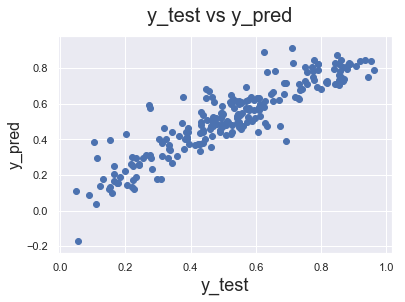

In [94]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#### Observation: From Above Scatter Plot we observed Linear Relationship between Actual Test Data Points & Predicted Test Data Points

# K. R-Square value

In [95]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.814806379419579